In [2]:
%matplotlib notebook
import genetic
import functions
import matplotlib.pyplot as plt
import numpy as np

def showResults(best_species, population, func):
    print("Best point: ", pop, ", F(x)=", func(pop), ", i = " , iters)

    base, zoomed, ranges = plots(best_species[-1])
    if (func != functions.__first):
        # Plotting base
        for p in population:
            base.plot(p[0], p[1], 'wo')
        for p in best_species:
            base.plot(p[0], p[1], 'bo')
        base.plot(pop[0], pop[1], 'ro')
        
        population = list(filter(lambda x: x[0] > ranges[0] and x[0] < ranges[1] and x[1] > ranges[2] and x[1] < ranges[3], population))
        best_species = list(filter(lambda x: x[0] > ranges[0] and x[0] < ranges[1] and x[1] > ranges[2] and x[1] < ranges[3], best_species))

        # Plotting zoomed 
        for p in population:
            zoomed.plot(p[0], p[1], 'wo')
        for p in best_species:
            zoomed.plot(p[0], p[1], 'bo')
        zoomed.plot(pop[0], pop[1], 'ro')
    else:
        # Plotting base
        for p in population:
            base.plot(p[0], func(p), 'go')

        base.plot(pop[0], func(pop), 'ro')

        population = list(filter(lambda x: x[0] > ranges[0] and x[0] < ranges[1], population))

        # Plotting zoomed
        for p in population:
            zoomed.plot(p[0], func(p), 'go')

        zoomed.plot(pop[0], func(pop), 'ro')
    plt.show()
    
    
functions_sample = [[functions.first(), "FIRST"], [functions.third(), "THIRD"],
                    [functions.fifth(), "FIFTH"], [functions.eighth(), "EIGHTH"], [functions.twelfth(), "TWELFTH"]]
crossover_sample = [[genetic.two_point_crossover, "TWO_POINT"], [genetic.uniform_crossover, "UNIFORM"]]
selection_sample = [[genetic.roulette_selection, "ROULETTE"], [genetic.tournament_selection, "TOURNAMENT"]]


# PARAMETERS TABLE

|Option | parameter name      | example                                                                                        |
|-------|---------------------|------------------------------------------------------------------------------------------------|
|FUNCTION|function_to_optimize|functions.first(), functions.third(), functions.fifth(), functions.eighth(), functions.twelfth()|
|CROSSOVER|crossover_func     |genetic.two_point_crossover, genetic.uniform_crossover                                          |
|SELECTION|selection_func     |genetic.roulette_selection, genetic.tournament_selection                                        |
|MUTATION |mutation_func      |genetic.mutate                                                                                  |
|MUTATION_P|mutation_probability|$$0 \leqslant x \leqslant 0.1$$                                                               |
|CROSSOVER_P|crossover_probability|$$0 \leqslant x \leqslant 1$$                                                               |


In [7]:



def buildTestTree(number_of_iterations, mutate_p):
    results = []
    for function in functions_sample:

        crossovers = []

        for crossover in crossover_sample:
            selections = []

            for selection in selection_sample:

                func, dimension, ranges, plots = function[0]

                values = []
                iterations = []

                for i in range(number_of_iterations):
                    pop, population, best_species, iters = genetic.gen_alg(crossover_func=crossover[0], selection_func=selection[0],
                                                mutation_func=genetic.mutate, mutation_pobability=mutate_p,
                                                func_to_optimize=func, dimension=dimension, function_ranges=ranges)
                    values.append(func(best_species[-1]))
                    iterations.append(iters)

                selections.append([selection[1], sum(values) / float(len(values)), sum(iterations) / float(len(iterations))])
                print("F: ", function[1], "C: ", crossover[1], "S: ", selection[1], "Average: ", sum(values) / float(len(values)))

            crossovers.append([crossover[1], selections])

        results.append([function[1], crossovers])
    return results


def parseResultsTree(tree):
    functions = []
    crossovers = []
    selections = []
    results = []
    iters = []  
    
    for i in tree:
        functions.append(i[0])
        
        crossover_vals = []
        crossover_iters = []
        
        for j in i[1]:
            crossovers.append(j[0])
            
            selection_vals = []
            selection_iters = []
            for k in j[1]:
                selections.append(k[0])
                
                selection_vals.append(k[1])
                selection_iters.append(k[2])
                
            crossover_vals.append(selection_vals)
            crossover_iters.append(selection_iters)
            
        results.append(crossover_vals)
        iters.append(crossover_iters)
        
    return functions, crossovers[:len(crossover_sample)], selections[:len(selection_sample)], results, iters

results = buildTestTree(15, 0.01)
funcs, crossovers, selections, results, iters = parseResultsTree(results)



    

F:  FIRST C:  TWO_POINT S:  ROULETTE Average:  0.01924382936710533
F:  FIRST C:  TWO_POINT S:  TOURNAMENT Average:  0.03993309590122449
F:  FIRST C:  UNIFORM S:  ROULETTE Average:  0.014858497276005795
F:  FIRST C:  UNIFORM S:  TOURNAMENT Average:  0.04577792976805206
F:  THIRD C:  TWO_POINT S:  ROULETTE Average:  0.10273080634332009
F:  THIRD C:  TWO_POINT S:  TOURNAMENT Average:  1.3380810356611976
F:  THIRD C:  UNIFORM S:  ROULETTE Average:  0.059035649766410535
F:  THIRD C:  UNIFORM S:  TOURNAMENT Average:  1.536174044669914
F:  FIFTH C:  TWO_POINT S:  ROULETTE Average:  0.06434891302493746
F:  FIFTH C:  TWO_POINT S:  TOURNAMENT Average:  0.1415868660536145
F:  FIFTH C:  UNIFORM S:  ROULETTE Average:  0.09466306789610511
F:  FIFTH C:  UNIFORM S:  TOURNAMENT Average:  0.35381535460515146
F:  EIGHTH C:  TWO_POINT S:  ROULETTE Average:  7.128337923906809e-05
F:  EIGHTH C:  TWO_POINT S:  TOURNAMENT Average:  0.0004192619359143178
F:  EIGHTH C:  UNIFORM S:  ROULETTE Average:  1.68409559

# WEAK MUTATION

In [8]:
from ipywidgets import *
import pandas as pd

def highlight_min(data, color='yellow'):
    
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)


dfs = [pd.DataFrame(results[i], columns=selections, index=crossovers) for i in range(len(funcs))]
df = pd.concat(dfs, keys=funcs)

style = df.style
for i in range(len(funcs)):
    style = style.apply(highlight_min, subset=pd.IndexSlice[funcs[i], selections[0:2]], axis=None)

style



In [9]:

dfs1 = [pd.DataFrame(iters[i], columns=selections, index=crossovers) for i in range(len(funcs))]
df1 = pd.concat(dfs1, keys=funcs)

style1 = df1.style

for i in range(len(funcs)):
    style1 = style1.apply(highlight_min, subset=pd.IndexSlice[funcs[i], selections[0:2]], axis=None)

style1

## First + roulette + uniform

Iterations:  2
Best point:  [0.9568232327517074] , F(x)= 0.0032686413104639706 , i =  2


<IPython.core.display.Javascript object>


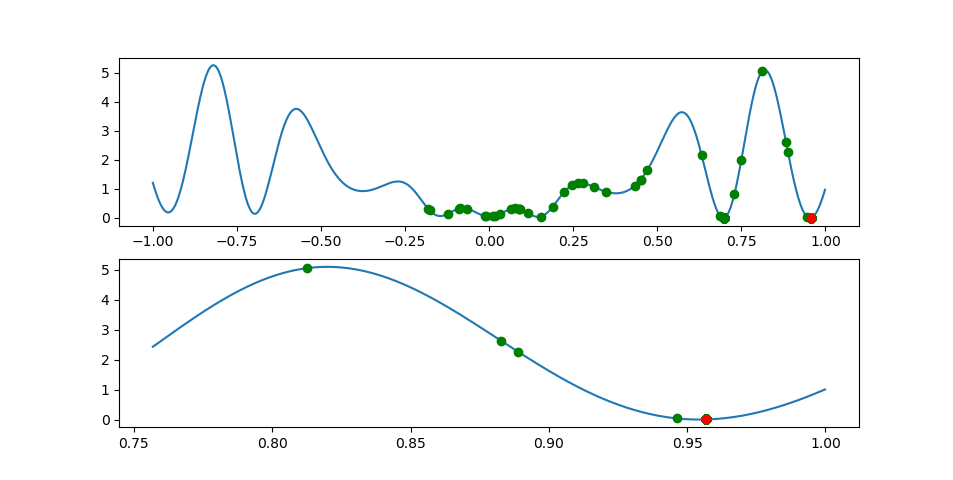

In [4]:
FUNCTION = functions.first()
CROSSOVER = genetic.uniform_crossover
SELECTION = genetic.roulette_selection
MUTATION = genetic.mutate
MUTATION_PROBABILITY = 0.1
CROSSOVER_PROBABILITY = 0.5
INITIAL_POPULATION = 100
POPULATION_LIMIT = 30
PRECISION = 1e-2

func, dimension, ranges, plots = FUNCTION

pop, population, best_species, iters = genetic.gen_alg(crossover_func=CROSSOVER, mutation_func=MUTATION, selection_func=SELECTION,
                            func_to_optimize=func, dimension=dimension, function_ranges=ranges,
                            crossover_probability=CROSSOVER_PROBABILITY, mutation_pobability=MUTATION_PROBABILITY,
                            initial_population=INITIAL_POPULATION, 
                            population_limit=POPULATION_LIMIT, precision=PRECISION)

print("Iterations: ", iters)
showResults(best_species, population, func)

# Third + roulette + uniform

Iterations:  5
Best point:  [-0.0012098145898211863, -0.001664204196839901] , F(x)= 5.8418525217263095e-06 , i =  5


<IPython.core.display.Javascript object>


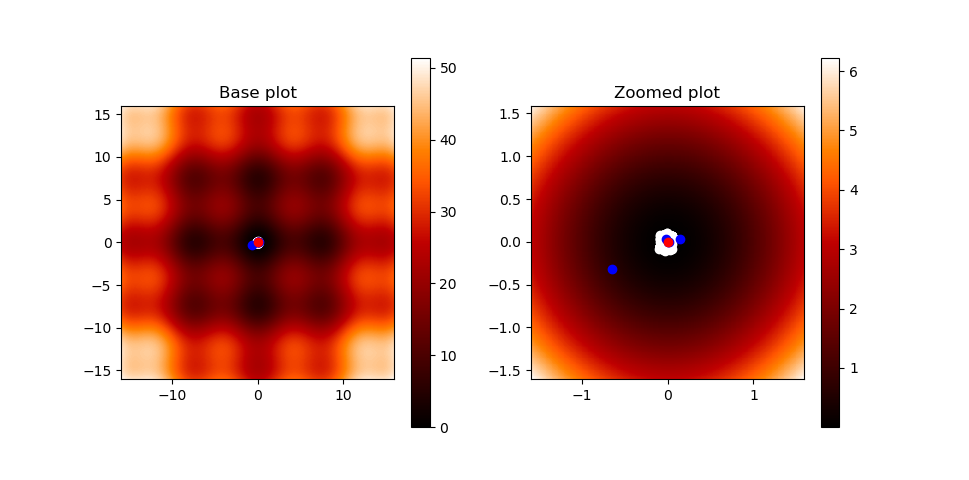

In [7]:
FUNCTION = functions.third()
CROSSOVER = genetic.uniform_crossover
SELECTION = genetic.roulette_selection
MUTATION = genetic.mutate
MUTATION_PROBABILITY = 0.1
CROSSOVER_PROBABILITY = 0.5
INITIAL_POPULATION = 100
POPULATION_LIMIT = 30
PRECISION = 1e-2

func, dimension, ranges, plots = FUNCTION

pop, population, best_species, iters = genetic.gen_alg(crossover_func=CROSSOVER, mutation_func=MUTATION, selection_func=SELECTION,
                            func_to_optimize=func, dimension=dimension, function_ranges=ranges,
                            crossover_probability=CROSSOVER_PROBABILITY, mutation_pobability=MUTATION_PROBABILITY,
                            initial_population=INITIAL_POPULATION, 
                            population_limit=POPULATION_LIMIT, precision=PRECISION)

print("Iterations: ", iters)
showResults(best_species, population, func)

# Fifth + roulette + uniform

Iterations:  3
Best point:  [0.9189492142726285, 0.830163108784963] , F(x)= 0.027031243871065515 , i =  3


<IPython.core.display.Javascript object>


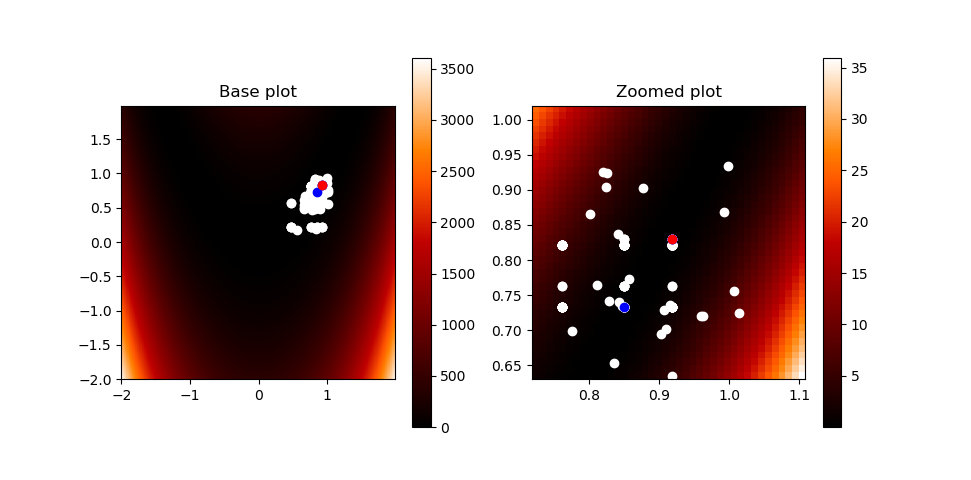

In [8]:
FUNCTION = functions.fifth()
CROSSOVER = genetic.uniform_crossover
SELECTION = genetic.roulette_selection
MUTATION = genetic.mutate
MUTATION_PROBABILITY = 0.1
CROSSOVER_PROBABILITY = 0.5
INITIAL_POPULATION = 100
POPULATION_LIMIT = 30
PRECISION = 1e-2

func, dimension, ranges, plots = FUNCTION

pop, population, best_species, iters = genetic.gen_alg(crossover_func=CROSSOVER, mutation_func=MUTATION, selection_func=SELECTION,
                            func_to_optimize=func, dimension=dimension, function_ranges=ranges,
                            crossover_probability=CROSSOVER_PROBABILITY, mutation_pobability=MUTATION_PROBABILITY,
                            initial_population=INITIAL_POPULATION, 
                            population_limit=POPULATION_LIMIT, precision=PRECISION)

print("Iterations: ", iters)
showResults(best_species, population, func)

# Eighth + roulette + two-point

Iterations:  2
Best point:  [2.25718331290067, -4.137612012792371] , F(x)= 7.224072917184105e-07 , i =  2


<IPython.core.display.Javascript object>


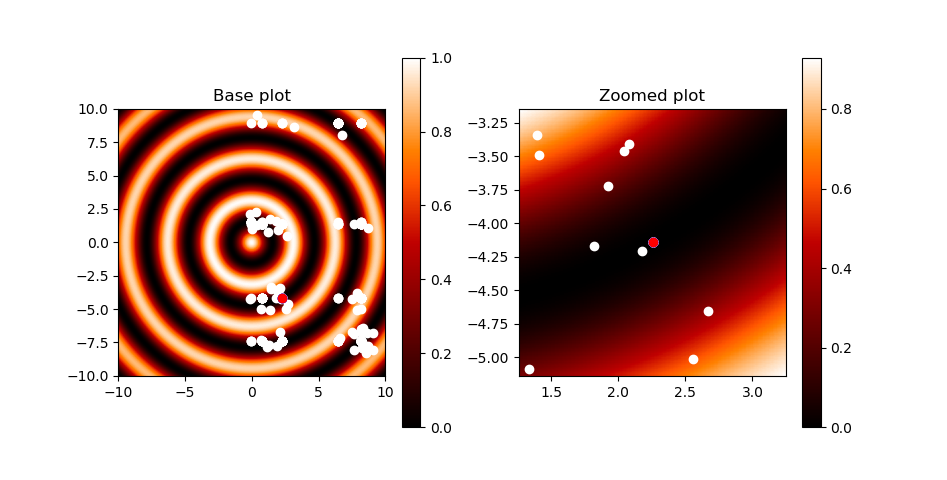

In [14]:
FUNCTION = functions.eighth()
CROSSOVER = genetic.two_point_crossover
SELECTION = genetic.roulette_selection
MUTATION = genetic.mutate
MUTATION_PROBABILITY = 0.1
CROSSOVER_PROBABILITY = 0.5
INITIAL_POPULATION = 100
POPULATION_LIMIT = 30
PRECISION = 1e-2

func, dimension, ranges, plots = FUNCTION

pop, population, best_species, iters = genetic.gen_alg(crossover_func=CROSSOVER, mutation_func=MUTATION, selection_func=SELECTION,
                            func_to_optimize=func, dimension=dimension, function_ranges=ranges,
                            crossover_probability=CROSSOVER_PROBABILITY, mutation_pobability=MUTATION_PROBABILITY,
                            initial_population=INITIAL_POPULATION, 
                            population_limit=POPULATION_LIMIT, precision=PRECISION)

print("Iterations: ", iters)
showResults(best_species, population, func)

# Twelfth + roulette + two-point

Iterations:  6
Best point:  [0.0008589498108816703, 0.0026675763449186124] , F(x)= 2.5363196709700596e-06 , i =  6


<IPython.core.display.Javascript object>


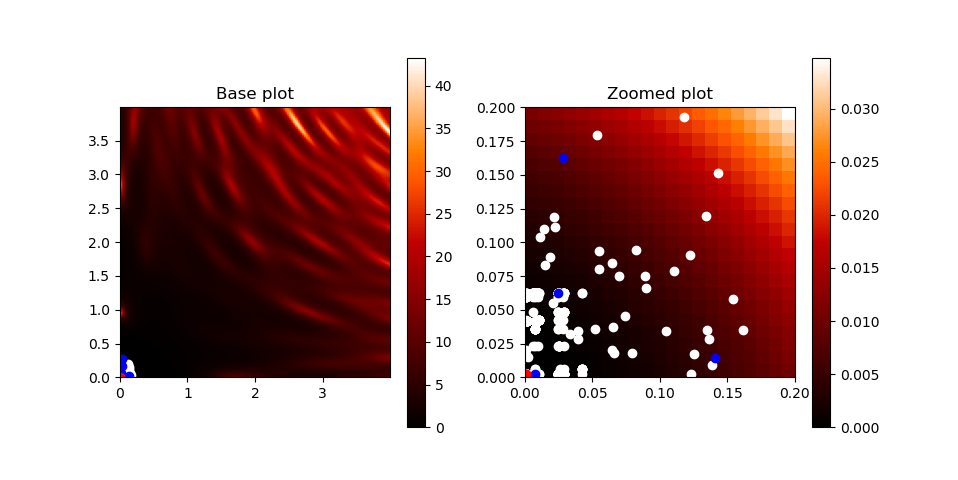

In [16]:
FUNCTION = functions.twelfth()
CROSSOVER = genetic.two_point_crossover
SELECTION = genetic.roulette_selection
MUTATION = genetic.mutate
MUTATION_PROBABILITY = 0.1
CROSSOVER_PROBABILITY = 0.5
INITIAL_POPULATION = 100
POPULATION_LIMIT = 30
PRECISION = 1e-2

func, dimension, ranges, plots = FUNCTION

pop, population, best_species, iters = genetic.gen_alg(crossover_func=CROSSOVER, mutation_func=MUTATION, selection_func=SELECTION,
                            func_to_optimize=func, dimension=dimension, function_ranges=ranges,
                            crossover_probability=CROSSOVER_PROBABILITY, mutation_pobability=MUTATION_PROBABILITY,
                            initial_population=INITIAL_POPULATION, 
                            population_limit=POPULATION_LIMIT, precision=PRECISION)

print("Iterations: ", iters)
showResults(best_species, population, func)